In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
# set plot size to fill the width of the page
plt.rcParams["figure.figsize"] = (8, 5)
import copy

# Model definition

In [2]:
# simple multi_layer perceptron with relu nonlinearity with pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.output_size = output_size
        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = nn.Linear(self.hidden_size, self.output_size)
        self.relu1 = nn.PReLU(num_parameters=1, init=0.1)
        self.relu2 = nn.PReLU(num_parameters=1, init=0.1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)            
        return x

/home/soheil/miniconda3/envs/lc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = Net(1, 500, 1)

In [7]:
model

Net(
  (fc1): Linear(in_features=1, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (relu1): PReLU(num_parameters=1)
  (relu2): PReLU(num_parameters=1)
)

In [21]:
def validation_loss(x, y, model):
    model.eval()
    y_pred = model(x)
    loss = F.mse_loss(y_pred, y)
    return loss

# Sample dataset

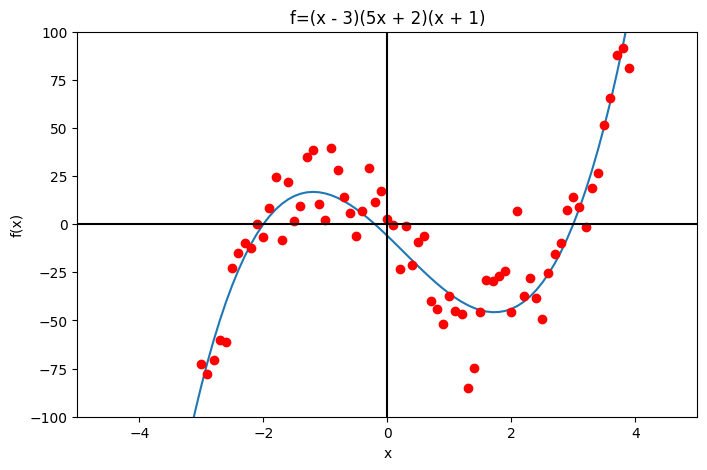

In [6]:
# plot function f=(x - 3)*(x + 2)*(x + 1)
x = np.arange(-5, 5, 0.1)
noise = np.random.normal(0, 15, x.shape)
y = (x - 3)*(x + 2)*(5*x + 1)
plt.plot(x, y)
plt.plot(x, y + noise, 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5, 5)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f=(x - 3)(5x + 2)(x + 1)')
plt.show()

In [10]:
model_no_reg = copy.deepcopy(model)

In [11]:
# train model on x and y + noise
# convert to torch tensors
# broadcast x to 100 x 1 tensor

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_no_reg.parameters(), lr=0.01)
wd = 0.000

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_no_reg(X)
    # compute loss
    loss = criterion(y_pred, Y) + (torch.norm(model_no_reg.fc1.weight, 1) + torch.norm(model_no_reg.fc2.weight, 1) + torch.norm(model_no_reg.fc3.weight, 1)) * wd
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))

torch.Size([100, 1])


  0%|          | 21/30000 [00:00<02:23, 209.13it/s]

epoch 0, loss 29501.892578125


  3%|▎         | 1029/30000 [00:03<01:31, 315.65it/s]

epoch 1000, loss 189.37562561035156


  7%|▋         | 2038/30000 [00:07<01:41, 276.07it/s]

epoch 2000, loss 178.92001342773438


 10%|█         | 3051/30000 [00:10<01:35, 283.13it/s]

epoch 3000, loss 154.48025512695312


 13%|█▎        | 4038/30000 [00:14<01:31, 283.24it/s]

epoch 4000, loss 140.14019775390625


 17%|█▋        | 5057/30000 [00:17<01:27, 284.80it/s]

epoch 5000, loss 134.8595733642578


 20%|██        | 6042/30000 [00:21<01:27, 274.13it/s]

epoch 6000, loss 126.7018051147461


 23%|██▎       | 7049/30000 [00:25<01:24, 271.72it/s]

epoch 7000, loss 105.98530578613281


 27%|██▋       | 8029/30000 [00:28<01:20, 273.47it/s]

epoch 8000, loss 122.16255950927734


 30%|███       | 9037/30000 [00:32<01:17, 272.10it/s]

epoch 9000, loss 90.26148223876953


 33%|███▎      | 10046/30000 [00:35<01:12, 273.46it/s]

epoch 10000, loss 84.13597869873047


 37%|███▋      | 11055/30000 [00:39<01:09, 274.07it/s]

epoch 11000, loss 141.79092407226562


 40%|████      | 12035/30000 [00:43<01:03, 282.12it/s]

epoch 12000, loss 92.658935546875


 43%|████▎     | 13048/30000 [00:46<00:47, 356.00it/s]

epoch 13000, loss 124.33609008789062


 47%|████▋     | 14043/30000 [00:49<00:57, 279.59it/s]

epoch 14000, loss 84.1692123413086


 50%|█████     | 15052/30000 [00:53<00:53, 277.36it/s]

epoch 15000, loss 73.07817840576172


 53%|█████▎    | 16039/30000 [00:56<00:49, 281.58it/s]

epoch 16000, loss 72.37796020507812


 57%|█████▋    | 17029/30000 [01:00<00:47, 271.18it/s]

epoch 17000, loss 71.09546661376953


 60%|██████    | 18043/30000 [01:04<00:48, 248.17it/s]

epoch 18000, loss 62.951133728027344


 63%|██████▎   | 19031/30000 [01:07<00:38, 284.28it/s]

epoch 19000, loss 59.67359924316406


 67%|██████▋   | 20030/30000 [01:11<00:36, 269.63it/s]

epoch 20000, loss 69.83514404296875


 70%|███████   | 21039/30000 [01:15<00:31, 280.88it/s]

epoch 21000, loss 113.20946502685547


 73%|███████▎  | 22027/30000 [01:18<00:30, 261.19it/s]

epoch 22000, loss 79.53703308105469


 77%|███████▋  | 23030/30000 [01:21<00:22, 312.87it/s]

epoch 23000, loss 54.596378326416016


 80%|████████  | 24044/30000 [01:25<00:21, 283.47it/s]

epoch 24000, loss 58.4738883972168


 83%|████████▎ | 25031/30000 [01:28<00:17, 280.07it/s]

epoch 25000, loss 62.42938995361328


 87%|████████▋ | 26040/30000 [01:32<00:14, 274.11it/s]

epoch 26000, loss 55.38420104980469


 90%|█████████ | 27049/30000 [01:36<00:10, 269.19it/s]

epoch 27000, loss 35.017486572265625


 93%|█████████▎| 28029/30000 [01:39<00:07, 274.30it/s]

epoch 28000, loss 56.16509246826172


 97%|█████████▋| 29040/30000 [01:43<00:03, 272.13it/s]

epoch 29000, loss 33.23444747924805


100%|██████████| 30000/30000 [01:46<00:00, 281.18it/s]


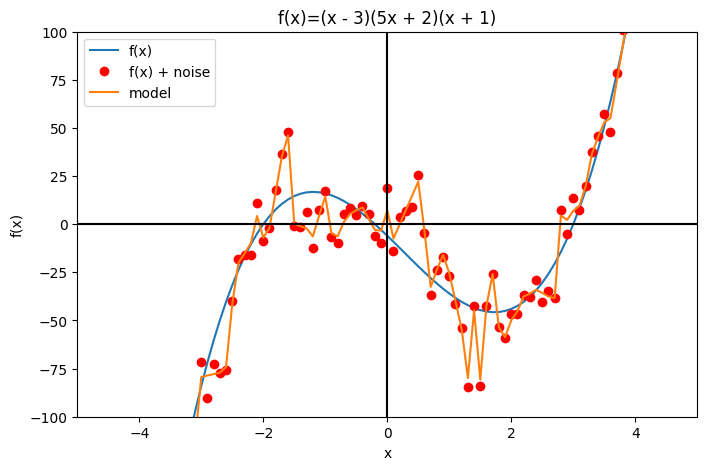

In [12]:
#plot model predictions
plt.plot(x, y, label='f(x)')
plt.plot(x, y + noise, 'ro', label='f(x) + noise')
plt.plot(x, model_no_reg(X).detach().numpy(), label='model')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-5, 5)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [13]:
model_with_wd = Net(1, 500, 1)

In [14]:
# train model on x and y + noise
# convert to torch tensors
# broadcast x to 100 x 1 tensor

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_with_wd.parameters(), lr=0.01)
wd = 0.2

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_with_wd(X)
    # compute loss
    loss = criterion(y_pred, Y) + (torch.norm(model_with_wd.fc1.weight, 1) + torch.norm(model_with_wd.fc2.weight, 1) + torch.norm(model_with_wd.fc3.weight, 1)) * wd
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))
        

torch.Size([100, 1])


  0%|          | 26/30000 [00:00<01:56, 256.56it/s]

epoch 0, loss 30626.607421875


  3%|▎         | 1028/30000 [00:03<01:49, 265.48it/s]

epoch 1000, loss 523.863037109375


  7%|▋         | 2055/30000 [00:07<01:43, 270.46it/s]

epoch 2000, loss 377.27801513671875


 10%|█         | 3051/30000 [00:11<01:36, 280.34it/s]

epoch 3000, loss 341.3099365234375


 13%|█▎        | 4045/30000 [00:14<01:33, 277.81it/s]

epoch 4000, loss 318.41552734375


 17%|█▋        | 5034/30000 [00:18<01:33, 267.77it/s]

epoch 5000, loss 300.1007080078125


 20%|██        | 6034/30000 [00:22<01:27, 272.55it/s]

epoch 6000, loss 291.4073791503906


 23%|██▎       | 7040/30000 [00:25<01:24, 270.67it/s]

epoch 7000, loss 283.0166931152344


 27%|██▋       | 8051/30000 [00:29<01:22, 266.48it/s]

epoch 8000, loss 278.0173034667969


 30%|███       | 9038/30000 [00:33<01:14, 279.58it/s]

epoch 9000, loss 269.69805908203125


 34%|███▎      | 10057/30000 [00:36<01:10, 283.72it/s]

epoch 10000, loss 265.2951354980469


 37%|███▋      | 11034/30000 [00:40<01:07, 280.56it/s]

epoch 11000, loss 262.51055908203125


 40%|████      | 12044/30000 [00:43<01:12, 246.40it/s]

epoch 12000, loss 259.9604187011719


 43%|████▎     | 13045/30000 [00:47<00:49, 342.60it/s]

epoch 13000, loss 268.16937255859375


 47%|████▋     | 14065/30000 [00:50<00:46, 344.63it/s]

epoch 14000, loss 257.28857421875


 50%|█████     | 15064/30000 [00:53<00:43, 345.93it/s]

epoch 15000, loss 250.90541076660156


 53%|█████▎    | 16047/30000 [00:57<00:49, 281.73it/s]

epoch 16000, loss 258.7177734375


 57%|█████▋    | 17031/30000 [01:00<00:45, 283.44it/s]

epoch 17000, loss 252.70166015625


 60%|██████    | 18028/30000 [01:04<00:50, 237.33it/s]

epoch 18000, loss 267.562255859375


 63%|██████▎   | 19028/30000 [01:08<00:47, 231.12it/s]

epoch 19000, loss 242.10101318359375


 67%|██████▋   | 20031/30000 [01:12<00:41, 242.41it/s]

epoch 20000, loss 238.57855224609375


 70%|███████   | 21052/30000 [01:15<00:26, 338.21it/s]

epoch 21000, loss 258.483642578125


 73%|███████▎  | 22043/30000 [01:19<00:28, 281.08it/s]

epoch 22000, loss 237.95376586914062


 77%|███████▋  | 23029/30000 [01:23<00:25, 275.34it/s]

epoch 23000, loss 229.60092163085938


 80%|████████  | 24041/30000 [01:26<00:21, 275.19it/s]

epoch 24000, loss 241.9127197265625


 84%|████████▎ | 25054/30000 [01:30<00:18, 270.70it/s]

epoch 25000, loss 232.4224853515625


 87%|████████▋ | 26040/30000 [01:34<00:14, 278.04it/s]

epoch 26000, loss 244.49716186523438


 90%|█████████ | 27052/30000 [01:37<00:10, 272.96it/s]

epoch 27000, loss 234.79226684570312


 93%|█████████▎| 28047/30000 [01:41<00:07, 269.67it/s]

epoch 28000, loss 235.93966674804688


 97%|█████████▋| 29031/30000 [01:44<00:03, 273.28it/s]

epoch 29000, loss 229.26821899414062


100%|██████████| 30000/30000 [01:48<00:00, 276.71it/s]


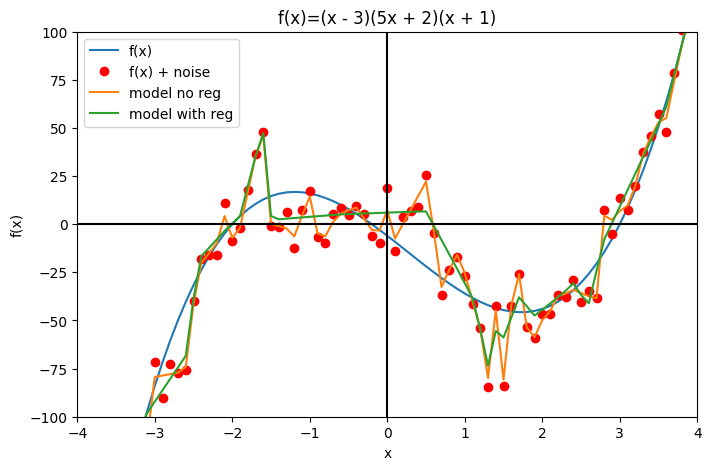

In [15]:
#plot model predictions
plt.plot(x, y, label='f(x)')
plt.plot(x, y + noise, 'ro', label='f(x) + noise')
plt.plot(x, model_no_reg(X).detach().numpy(), label='model no reg')
plt.plot(x, model_with_wd(X).detach().numpy(), label='model with reg')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-4, 4)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [11]:
model_with_LC = Net(1, 500, 1)

In [12]:
# train model on x and y + noise
# convert to torch tensors
# broadcast x to 100 x 1 tensor

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_with_LC.parameters(), lr=0.01)
lc2 = 500
lc1 = 50

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_with_LC(X)
    # compute loss
    # get prelu slope
    slope1 = model_with_LC.relu1.weight
    slope2 = model_with_LC.relu2.weight
    loss = criterion(y_pred, Y) + lc2 * (slope2 - 1)**2 + lc1 * (slope1 - 1)**2
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))

torch.Size([100, 1])


  0%|          | 26/30000 [00:00<01:57, 255.88it/s]

epoch 0, loss 27556.6328125


  4%|▎         | 1061/30000 [00:03<01:33, 310.24it/s]

epoch 1000, loss 269.0860900878906


  7%|▋         | 2047/30000 [00:06<01:32, 302.92it/s]

epoch 2000, loss 222.1533966064453


 10%|█         | 3038/30000 [00:10<01:31, 293.51it/s]

epoch 3000, loss 246.9427032470703


 14%|█▎        | 4058/30000 [00:13<01:28, 291.95it/s]

epoch 4000, loss 193.56048583984375


 17%|█▋        | 5048/30000 [00:16<01:25, 292.32it/s]

epoch 5000, loss 187.8527374267578


 20%|██        | 6038/30000 [00:20<01:21, 293.49it/s]

epoch 6000, loss 180.37469482421875


 24%|██▎       | 7058/30000 [00:23<01:17, 294.57it/s]

epoch 7000, loss 178.2635040283203


 27%|██▋       | 8023/30000 [00:27<01:36, 227.67it/s]

epoch 8000, loss 194.74893188476562


 30%|███       | 9056/30000 [00:31<01:11, 293.46it/s]

epoch 9000, loss 178.38267517089844


 33%|███▎      | 10040/30000 [00:34<01:19, 250.20it/s]

epoch 10000, loss 170.68438720703125


 37%|███▋      | 11037/30000 [00:38<01:15, 251.81it/s]

epoch 11000, loss 395.39166259765625


 40%|████      | 12052/30000 [00:42<01:02, 288.65it/s]

epoch 12000, loss 168.93948364257812


 43%|████▎     | 13044/30000 [00:45<00:57, 296.74it/s]

epoch 13000, loss 168.49517822265625


 47%|████▋     | 14041/30000 [00:48<00:53, 297.28it/s]

epoch 14000, loss 166.92877197265625


 50%|█████     | 15034/30000 [00:52<00:50, 295.82it/s]

epoch 15000, loss 166.45057678222656


 53%|█████▎    | 16048/30000 [00:55<00:56, 248.60it/s]

epoch 16000, loss 190.60980224609375


 57%|█████▋    | 17048/30000 [00:59<00:39, 329.04it/s]

epoch 17000, loss 164.37579345703125


 60%|██████    | 18051/30000 [01:02<00:40, 295.77it/s]

epoch 18000, loss 165.56520080566406


 63%|██████▎   | 19043/30000 [01:06<00:36, 300.70it/s]

epoch 19000, loss 244.5155029296875


 67%|██████▋   | 20054/30000 [01:09<00:33, 295.76it/s]

epoch 20000, loss 161.31295776367188


 70%|███████   | 21042/30000 [01:12<00:31, 288.77it/s]

epoch 21000, loss 162.7227325439453


 74%|███████▎  | 22070/30000 [01:15<00:21, 366.40it/s]

epoch 22000, loss 165.35244750976562


 77%|███████▋  | 23071/30000 [01:18<00:19, 362.90it/s]

epoch 23000, loss 161.0669708251953


 80%|████████  | 24034/30000 [01:21<00:17, 339.03it/s]

epoch 24000, loss 168.0196990966797


 83%|████████▎ | 25047/30000 [01:24<00:16, 298.13it/s]

epoch 25000, loss 205.079833984375


 87%|████████▋ | 26060/30000 [01:27<00:13, 296.94it/s]

epoch 26000, loss 160.32571411132812


 90%|█████████ | 27034/30000 [01:31<00:09, 296.69it/s]

epoch 27000, loss 221.81871032714844


 94%|█████████▎| 28052/30000 [01:34<00:05, 357.54it/s]

epoch 28000, loss 159.23147583007812


 97%|█████████▋| 29026/30000 [01:37<00:03, 250.34it/s]

epoch 29000, loss 156.70516967773438


100%|██████████| 30000/30000 [01:41<00:00, 294.59it/s]


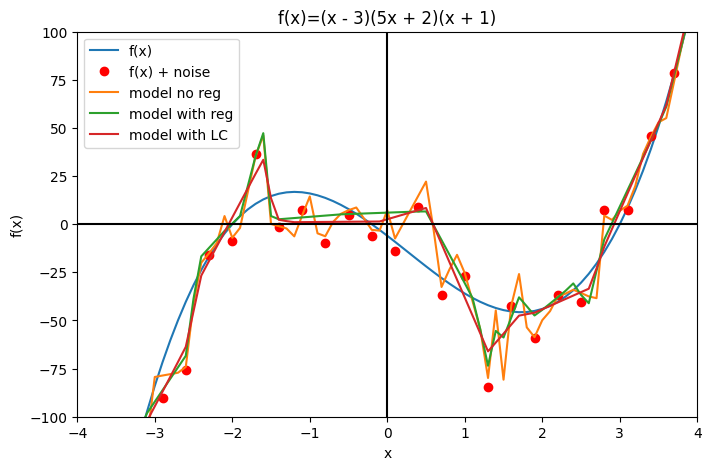

In [18]:
#plot model predictions
plt.plot(x, y, label='f(x)')
plt.plot(x[::3], y[::3] + noise[::3], 'ro', label='f(x) + noise')
plt.plot(x, model_no_reg(X).detach().numpy(), label='model no reg')
plt.plot(x, model_with_wd(X).detach().numpy(), label='model with reg')
plt.plot(x, model_with_LC(X).detach().numpy(), label='model with LC')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-4, 4)
plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [19]:
Y_validation = torch.from_numpy(y.reshape(-1,1)).float()
print("validation loss for model with no regularization: ", validation_loss(X, Y_validation, model_no_reg).item())
print("validation loss for model with weight decay: ", validation_loss(X, Y_validation, model_with_wd).item())
print("validation loss for model with LC: ", validation_loss(X, Y_validation, model_with_LC).item())

validation loss for model with no regularization:  230.47793579101562
validation loss for model with weight decay:  143.01930236816406
validation loss for model with LC:  114.23343658447266


In [20]:
slope1 = model_with_LC.relu1.weight
slope2 = model_with_LC.relu2.weight
print(slope1)
print(slope2)

Parameter containing:
tensor([0.1572], requires_grad=True)
Parameter containing:
tensor([1.0115], requires_grad=True)


In [21]:
print(np.max(model_with_LC.fc1.weight.detach().numpy()))
print(np.min(model_with_LC.fc1.weight.detach().numpy()))

print(np.max(model_with_LC.fc2.weight.detach().numpy()))
print(np.min(model_with_LC.fc2.weight.detach().numpy()))

print(np.max(model_with_LC.fc3.weight.detach().numpy()))
print(np.min(model_with_LC.fc3.weight.detach().numpy()))

0.90508
-0.9294661
4.3232894
-5.4781175
0.54712075
-0.42609194


In [22]:
print(np.max(model_with_wd.fc1.weight.detach().numpy()))
print(np.min(model_with_wd.fc1.weight.detach().numpy()))

print(np.max(model_with_wd.fc2.weight.detach().numpy()))
print(np.min(model_with_wd.fc2.weight.detach().numpy()))

print(np.max(model_with_wd.fc3.weight.detach().numpy()))
print(np.min(model_with_wd.fc3.weight.detach().numpy()))

2.3680484
-2.290421
4.391154
-1.454967
5.6242785
-7.272868


In [23]:
print(np.max(model_no_reg.fc1.weight.detach().numpy()))
print(np.min(model_no_reg.fc1.weight.detach().numpy()))

print(np.max(model_no_reg.fc2.weight.detach().numpy()))
print(np.min(model_no_reg.fc2.weight.detach().numpy()))

print(np.max(model_no_reg.fc3.weight.detach().numpy()))
print(np.min(model_no_reg.fc3.weight.detach().numpy()))

3.7083929
-1.5809356
6.1794243
-5.216437
3.1582026
-3.4477031


## Dropout experiments

In [3]:
class Net_dropout(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net_dropout, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.output_size = output_size
        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = nn.Linear(self.hidden_size, self.hidden_size)
        self.fc3 = nn.Linear(self.hidden_size, self.output_size)
        self.relu1 = nn.PReLU(num_parameters=1, init=0.1)
        self.relu2 = nn.PReLU(num_parameters=1, init=0.1)
        self.droupout1 = nn.Dropout(p=0.5)
        self.droupout2 = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.droupout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.droupout2(x)
        x = self.fc3(x)            
        return x

In [4]:
model_with_dropout = Net_dropout(1, 500, 1)
model_with_dropout

Net_dropout(
  (fc1): Linear(in_features=1, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (relu1): PReLU(num_parameters=1)
  (relu2): PReLU(num_parameters=1)
  (droupout1): Dropout(p=0.5, inplace=False)
  (droupout2): Dropout(p=0.5, inplace=False)
)

In [8]:
model_with_dropout = Net_dropout(1, 500, 1)
model_with_dropout.train()

X = torch.from_numpy(x.reshape(-1,1)).float()
Y = torch.from_numpy((y + noise).reshape(-1,1)).float()

print(X.shape)
# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.01)
lc2 = 500
lc1 = 50

losses = []

# train model
for epoch in tqdm.tqdm(range(30000)):
    # forward pass
    y_pred = model_with_dropout(X)
    # compute loss
    # get prelu slope
    # slope1 = model_with_LC.relu1.weight
    # slope2 = model_with_LC.relu2.weight
    loss = criterion(y_pred, Y) 
    # zero gradients
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    losses.append(loss.item())
    # update weights
    optimizer.step()
    if epoch % 1000 == 0:
        tqdm.tqdm.write('epoch {}, loss {}'.format(epoch, loss.item()))

# model_with_dropout.eval()

torch.Size([100, 1])


  0%|          | 27/30000 [00:00<01:52, 265.55it/s]

epoch 0, loss 27008.005859375


  4%|▎         | 1052/30000 [00:03<01:30, 321.53it/s]

epoch 1000, loss 702.9688110351562


  7%|▋         | 2050/30000 [00:06<01:32, 301.91it/s]

epoch 2000, loss 595.0787353515625


 10%|█         | 3053/30000 [00:09<01:34, 284.11it/s]

epoch 3000, loss 1245.6573486328125


 14%|█▎        | 4059/30000 [00:13<01:29, 288.95it/s]

epoch 4000, loss 437.1073913574219


 17%|█▋        | 5048/30000 [00:16<01:28, 281.87it/s]

epoch 5000, loss 788.4671630859375


 20%|██        | 6037/30000 [00:20<01:09, 344.57it/s]

epoch 6000, loss 682.1084594726562


 24%|██▎       | 7055/30000 [00:23<01:06, 345.12it/s]

epoch 7000, loss 509.3575439453125


 27%|██▋       | 8059/30000 [00:26<01:05, 334.41it/s]

epoch 8000, loss 550.5761108398438


 30%|███       | 9067/30000 [00:28<00:59, 349.73it/s]

epoch 9000, loss 650.6943359375


 33%|███▎      | 10039/30000 [00:31<00:56, 353.88it/s]

epoch 10000, loss 701.8343505859375


 37%|███▋      | 11051/30000 [00:34<00:54, 347.81it/s]

epoch 11000, loss 874.9813842773438


 40%|████      | 12058/30000 [00:37<00:50, 351.94it/s]

epoch 12000, loss 563.071533203125


 44%|████▎     | 13071/30000 [00:40<00:47, 354.67it/s]

epoch 13000, loss 621.0108032226562


 47%|████▋     | 14047/30000 [00:43<00:45, 351.48it/s]

epoch 14000, loss 630.3827514648438


 50%|█████     | 15053/30000 [00:46<00:52, 283.61it/s]

epoch 15000, loss 579.7276000976562


 53%|█████▎    | 16045/30000 [00:49<00:49, 284.18it/s]

epoch 16000, loss 665.887451171875


 57%|█████▋    | 17035/30000 [00:53<00:45, 286.59it/s]

epoch 17000, loss 714.959716796875


 60%|██████    | 18045/30000 [00:56<00:41, 285.00it/s]

epoch 18000, loss 697.6571044921875


 63%|██████▎   | 19030/30000 [01:00<00:42, 255.30it/s]

epoch 19000, loss 578.821044921875


 67%|██████▋   | 20054/30000 [01:04<00:36, 273.03it/s]

epoch 20000, loss 1037.9918212890625


 70%|███████   | 21033/30000 [01:07<00:32, 279.75it/s]

epoch 21000, loss 642.2646484375


 74%|███████▎  | 22060/30000 [01:11<00:23, 334.41it/s]

epoch 22000, loss 484.9967041015625


 77%|███████▋  | 23052/30000 [01:14<00:20, 332.12it/s]

epoch 23000, loss 635.5335693359375


 80%|████████  | 24028/30000 [01:18<00:28, 206.30it/s]

epoch 24000, loss 533.828857421875


 83%|████████▎ | 25036/30000 [01:21<00:18, 272.38it/s]

epoch 25000, loss 711.849853515625


 87%|████████▋ | 26056/30000 [01:25<00:13, 289.99it/s]

epoch 26000, loss 496.2266540527344


 90%|█████████ | 27040/30000 [01:28<00:10, 290.64it/s]

epoch 27000, loss 552.7783813476562


 93%|█████████▎| 28030/30000 [01:32<00:06, 288.89it/s]

epoch 28000, loss 566.2355346679688


 97%|█████████▋| 29040/30000 [01:35<00:03, 282.00it/s]

epoch 29000, loss 660.6500244140625


100%|██████████| 30000/30000 [01:38<00:00, 303.08it/s]


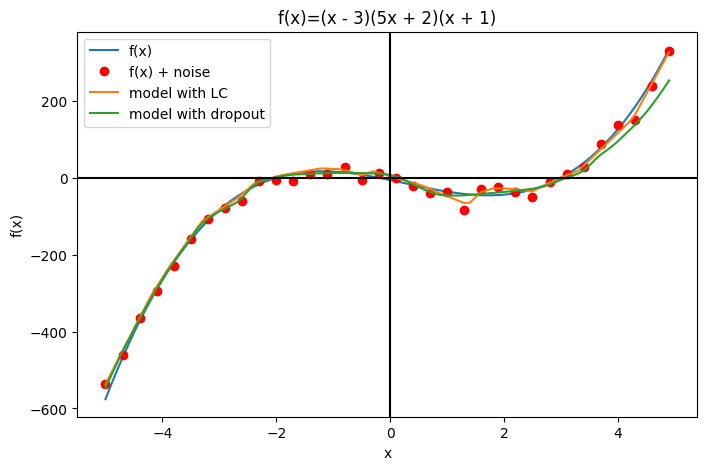

In [26]:
#plot model predictions
model_with_dropout.eval()
plt.plot(x, y, label='f(x)')
plt.plot(x[::3], y[::3] + noise[::3], 'ro', label='f(x) + noise')
# plt.plot(x, model_no_reg(X).detach().numpy(), label='model no reg')
# plt.plot(x, model_with_wd(X).detach().numpy(), label='model with reg')
plt.plot(x, model_with_LC(X).detach().numpy(), label='model with LC')
plt.plot(x, model_with_dropout(X).detach().numpy(), label='model with dropout')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.xlim(-4, 4)
# plt.ylim(-100, 100)
# baseline
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('f(x)=(x - 3)(5x + 2)(x + 1)')
plt.legend()
plt.show()

In [25]:
Y_validation = torch.from_numpy(y.reshape(-1,1)).float()
model_with_dropout.eval()
print("validation loss for model with LC: ", validation_loss(X, Y_validation, model_with_LC).item())
print("validation loss for model with dropout: ", validation_loss(X, Y_validation, model_with_dropout).item())

validation loss for model with LC:  110.41577911376953
validation loss for model with dropout:  416.85662841796875
